In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from  sklearn.ensemble import RandomForestClassifier
import pickle
heart_data =  pd.read_csv('heart.csv')
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
#Basic data information
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
#Let's check the shape of the data

print("(row, columns)",heart_data.shape)

(row, columns) (303, 14)


In [4]:
#Let's check the unique value of each feature
heart_data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [5]:
#Let's look at the descriptive statistics of the dataset
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:

# Any missing values
heart_data.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [7]:
# Any balance between positive and negative predictions?
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
# Let's plot the distribution of the target variable(class/label)

In [8]:
target = heart_data['target']

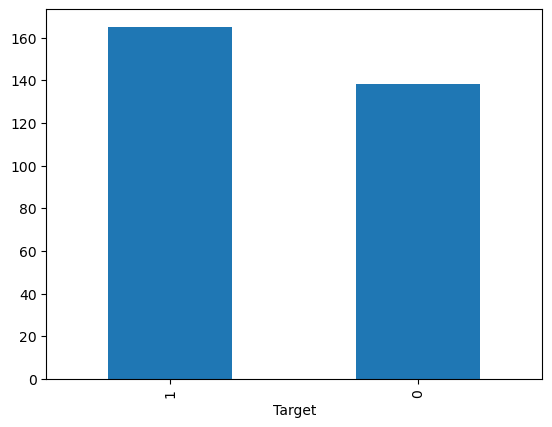

In [9]:
target.value_counts().plot(kind='bar')
plt.xlabel("Target")
plt.show()

In [10]:
#Let's check feature correlation 

corr = heart_data.corr()

In [11]:
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
corr

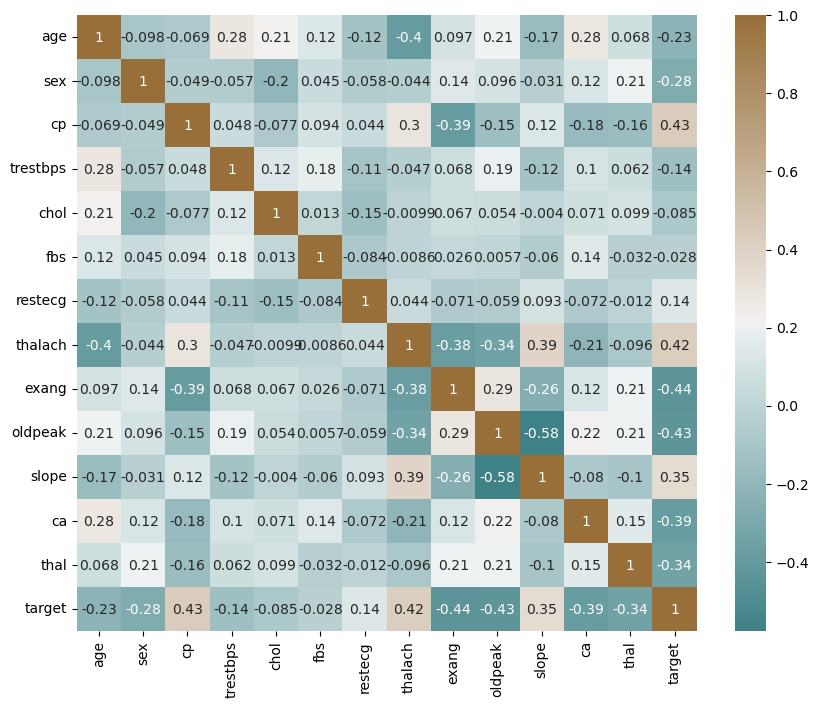

In [15]:
plt.subplots(figsize=(10,8))

sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot=True,
            cmap=sns.diverging_palette(200, 50, as_cmap=True))
plt.show()

In [16]:
#Get features and labels
X = heart_data.drop(columns='target')
y = heart_data['target']

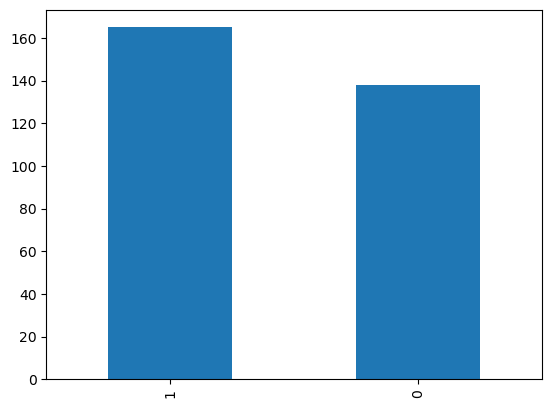

In [17]:
y.value_counts().plot(kind= 'bar')
plt.show()

In [ ]:
#Let's address the imbalanced class problem using SMOTE
#SMOTE- Synthetic Minority Oversampling TEchnique

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [20]:
y.value_counts()

1    165
0    165
Name: target, dtype: int64

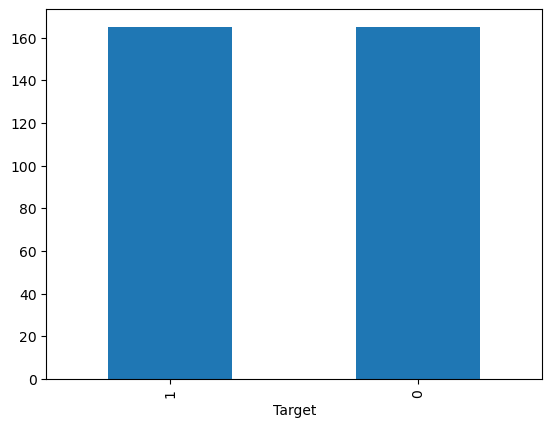

In [21]:
y.value_counts().plot(kind='bar')
plt.xlabel("Target")
plt.show()

In [22]:
#Train-Test dataset split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [23]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
217,63,1,0,130,330,1,0,132,1,1.800000,2,3,3
29,53,1,2,130,197,1,0,152,0,1.200000,0,0,2
320,51,0,0,128,306,0,1,141,0,1.453759,0,0,2
20,59,1,0,135,234,0,1,161,0,0.500000,1,0,3
46,44,1,2,140,235,0,0,180,0,0.000000,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,53,1,0,123,214,0,1,166,0,1.064796,2,2,3
192,54,1,0,120,188,0,1,113,0,1.400000,1,1,3
117,56,1,3,120,193,0,0,162,0,1.900000,1,0,3
47,47,1,2,138,257,0,0,156,0,0.000000,2,0,2


In [24]:
#Let's normalise / scale the feature sets

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train

array([[0.70833333, 1.        , 0.        , ..., 1.        , 0.75      ,
        1.        ],
       [0.5       , 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.45833333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.66666667],
       ...,
       [0.5625    , 1.        , 1.        , ..., 0.5       , 0.        ,
        1.        ],
       [0.375     , 1.        , 0.66666667, ..., 1.        , 0.        ,
        0.66666667],
       [0.60416667, 1.        , 0.33333333, ..., 0.5       , 0.        ,
        0.66666667]])

# K-Nearest Neighbour Algorithm

In [ ]:
#Let's use the features to train KNN algorithm
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
#What's the classification accuracy of the model?    
accuracy_score(y_test, y_pred)

In [ ]:
# Let's use cross validation technique to evaluate our model

In [ ]:
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring = "accuracy")

In [ ]:
#Print the accuracy for each value of CV
scores

In [ ]:
#Compute the mean accuracy
scores.mean()

In [ ]:
#We can persist our model for use elsewhere....in an application for example.
model = pickle.dumps(knn)# This persists the knn model

In [ ]:
s_model = pickle.loads(model)

In [ ]:
pred = s_model.predict(X_test)#predicts the class using the test data
pred[:10]

# Let's use Logistic Regression

In [ ]:
logis =  LogisticRegression()

In [ ]:
logmodel = logis.fit(X_train, y_train)

In [ ]:
# Let's evaluate the model

In [ ]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logmodel.score(X_train, y_train)))# What is being evaluated here?
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(logmodel.score(X_test, y_test)))# And here?

In [ ]:
#What's the classification accuracy of the model?
#using accuracy_score
accuracy_score(y_test, y_pred, normalize = True)

In [ ]:
log_pred = logmodel.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
y_pred[:10]

# KNN

In [ ]:
#Get the unique values of labels
target = y.unique()
target

In [26]:
#Let's use the features to train KNN algorithm
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [27]:
#Generate predicted labels
knn_pred = knn.predict(X_test)

In [28]:
#Evaluate using cross validation setting CV = 10. The CV can be tuned.
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring ='accuracy')

In [29]:
#Print the accuracy scores
scores

array([0.83333333, 0.7826087 , 0.73913043, 0.73913043, 0.86956522,
       0.82608696, 0.82608696, 0.69565217, 0.7826087 , 0.7826087 ])

In [30]:
# Compute the mean accuracy
scores.mean()

0.7876811594202898

In [32]:
#Generate the classification report showing the Precision, Recall and F-Score
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        41
           1       0.89      0.81      0.85        58

    accuracy                           0.83        99
   macro avg       0.82      0.83      0.83        99
weighted avg       0.83      0.83      0.83        99



In [ ]:
# KNN's Confusion Matrix

In [33]:
knn_conf_mx = confusion_matrix(y_test,knn_pred)

In [34]:
knn_conf_mx

array([[35,  6],
       [11, 47]])

In [ ]:
#Let's normalize the matrix
nor_knn_conf_mx = confusion_matrix(y_test,knn_pred,normalize='true', labels = target)

In [ ]:
print(knn_conf_mx)

In [ ]:
# Let's plot the confusion matrix using heatmap

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(knn_conf_mx, cmap="Blues", annot = True, cbar_kws={"orientation":"vertical","label":"color bar"})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Using SVM

In [ ]:
#You can tune the regularization parameter(C) of SVC
svc = SVC(C=3)

In [ ]:
svc_model = svc.fit(X_train, y_train)

In [ ]:
svc_pred = svc_model.predict(X_test)

In [ ]:
svc_pred[:10]

In [ ]:
#Generate the classification report showing the Precision, Recall and F-Score
print(classification_report(y_test, svc_pred, labels = target))

# Confusion Matrix

In [ ]:
svc_conf_mx = confusion_matrix(y_test,svc_pred, labels = target)

In [ ]:
print(svc_conf_mx)

In [ ]:

#Normalized Matrix
nor_svc_conf_mx = confusion_matrix(y_test,svc_pred,normalize='true', labels = target)

In [ ]:
print(nor_svc_conf_mx)

In [ ]:
# Let's plot the confusion matrix using heatmap

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(svc_conf_mx, cmap="Greens", annot = True, cbar_kws={"orientation":"vertical","label":"color bar"})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Using Multilayer Perceptron Classifier
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(random_state=1, max_iter = 200)

In [ ]:
mlp_model = mlp.fit(X_train, y_train)

In [ ]:
mlp_pred = mlp_model.predict(X_test)

In [ ]:
#Generate the classification report showing the Precision, Recall and F-Score
print(classification_report(y_test, mlp_pred, labels = target))

In [ ]:
mlp_conf_mx = confusion_matrix(y_test,mlp_pred, labels = target)

In [ ]:
print(mlp_conf_mx)

In [ ]:
mlp_conf_mx = confusion_matrix(y_test,mlp_pred, labels = target, normalize = 'true')

In [ ]:
print(mlp_conf_mx)

In [ ]:
#Let's plot the confusion matrix using heatmap

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(mlp_conf_mx, cmap="Greens", annot = True, cbar_kws={"orientation":"vertical","label":"color bar"})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()